In [3]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:

path = '/content/drive/My Drive/Mount_data/winemag-data-130k-v2.csv'  #change dir to your project folder

In [6]:
df = pd.read_csv(path, index_col= 0)

In [7]:
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [8]:
df.shape

(129971, 13)

In [9]:
df.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
       'variety', 'winery'],
      dtype='object')

In [10]:
# .join separate chr with - ""
print("There are {} observations and {} features in this dataset.\n ".format(df.shape[0], df.shape[1]))
print("There are {} types of wine in this dataset such as {}.....".format(len(df.variety.unique()), ",".join(df.variety.unique()[0:5])))
print("There are {} countries producing wine in this dataset such as {}....\n".format(len(df.country.unique()), ",".join(df.country.unique()[0:5])))

There are 129971 observations and 13 features in this dataset.
 
There are 708 types of wine in this dataset such as White Blend,Portuguese Red,Pinot Gris,Riesling,Pinot Noir.....
There are 44 countries producing wine in this dataset such as Italy,Portugal,US,Spain,France....



In [11]:
df.country.value_counts()

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Czech Re

In [12]:
df['desc_count'] = df['description'].str.len()

In [13]:
#为什么df 只剩了3个columns????  因为只有这三个列是数字类型的

df[["country", "description","desc_count", "points"]].head(10)

,country,description,desc_count,points
0,Italy,"Aromas include tropical fruit, broom, brimston...",172,87
1,Portugal,"This is ripe and fruity, a wine that is smooth...",227,87
2,US,"Tart and snappy, the flavors of lime flesh and...",186,87
3,US,"Pineapple rind, lemon pith and orange blossom ...",199,87
4,US,"Much like the regular bottling from 2012, this...",249,87
5,Spain,Blackberry and raspberry aromas show a typical...,261,87
6,Italy,"Here's a bright, informal red that opens with ...",181,87
7,France,This dry and restrained wine offers spice in p...,122,87
8,Germany,Savory dried thyme notes accent sunnier flavor...,156,87
9,France,This has great depth of flavor with its fresh ...,160,87


In [14]:
# groupby country
country = df.groupby('country')
country.describe().head(10)

points                       ... desc_count               
                         count       mean       std  ...        50%     75%    max
country                                              ...                          
Argentina               3800.0  86.710263  3.179627  ...      247.0  285.00  479.0
Armenia                    2.0  87.500000  0.707107  ...      214.5  214.75  215.0
Australia               2329.0  88.580507  2.989900  ...      251.0  294.00  631.0
Austria                 3345.0  90.101345  2.499799  ...      238.0  290.00  688.0
Bosnia and Herzegovina     2.0  86.500000  2.121320  ...      216.5  238.25  260.0
Brazil                    52.0  84.673077  2.340782  ...      219.0  254.25  334.0
Bulgaria                 141.0  87.936170  2.077817  ...      219.0  251.00  465.0
Canada                   257.0  89.369650  2.384752  ...      247.0  287.00  467.0
Chile                   4472.0  86.493515  2.692959  ...      248.0  285.00  492.0
China                      1.0  89.000000       NaN  ...      260.0  260.00  260.0

[10 rows x 24 columns]

In [15]:
#top 5 highest avg points amount all 44 countries
country.mean().sort_values(by="points", ascending= False).head()

,points,price,desc_count
country,,,
England,91.581081,51.681159,370.594595
India,90.222222,13.333333,268.888889
Austria,90.101345,30.762772,249.613752
Germany,89.851732,42.257547,254.593995
Canada,89.369650,35.712598,254.225681


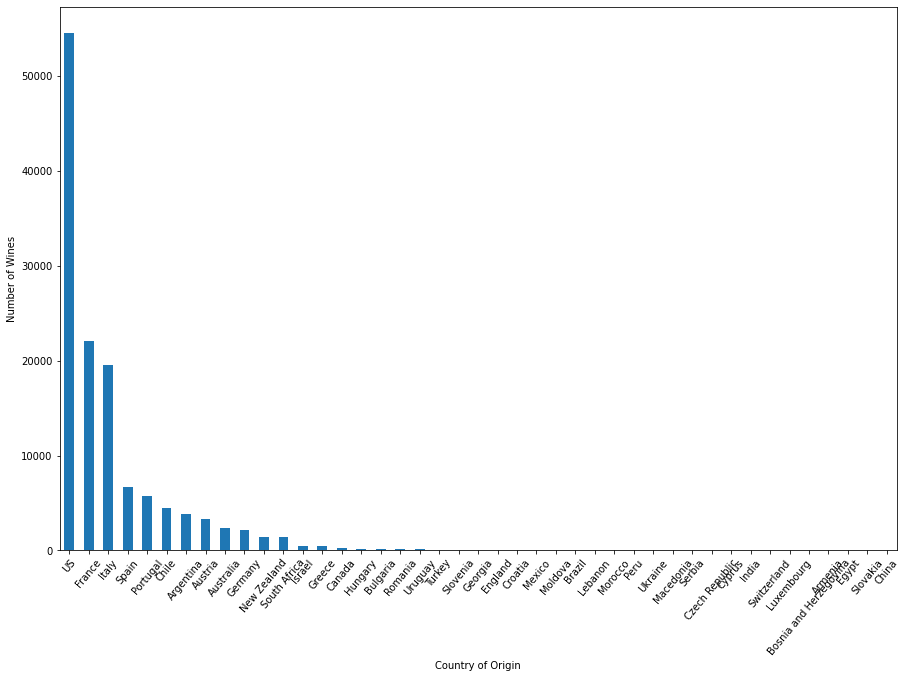

In [16]:
plt.figure(figsize=(15,10))
country.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Country of Origin")
plt.ylabel("Number of Wines")
plt.show()

In [17]:
'''plt.figure(figsize=(15,10))
country.max().sort_values(by="points",ascending=False)["points"].plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Country of Origin")
plt.ylabel("Highest point of Wines")
plt.show()

Australia, US, Portugal, Italy, and France all have 100 points wine. If you notice, 
Portugal ranks 5th and Australia ranks 9th in the number of wines produces in the dataset,
 and both countries have less than 8000 types of wine.
That's a little bit of data exploration to get to know the dataset that you are using today.
 Now you will start to dive into the main course of the meal: WordCloud.'''

'plt.figure(figsize=(15,10))\ncountry.max().sort_values(by="points",ascending=False)["points"].plot.bar()\nplt.xticks(rotation=50)\nplt.xlabel("Country of Origin")\nplt.ylabel("Highest point of Wines")\nplt.show()\n\nAustralia, US, Portugal, Italy, and France all have 100 points wine. If you notice, \nPortugal ranks 5th and Australia ranks 9th in the number of wines produces in the dataset,\n and both countries have less than 8000 types of wine.\nThat\'s a little bit of data exploration to get to know the dataset that you are using today.\n Now you will start to dive into the main course of the meal: WordCloud.'

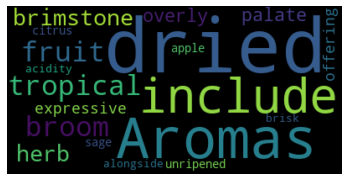

In [18]:
# start with the first value
text = df.description[0]

#create/generate a word cloud image
wordcloud = WordCloud().generate(text)

#Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

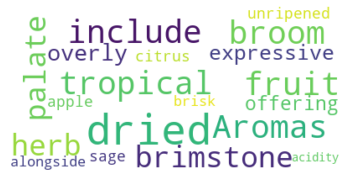

In [19]:
# lower max front size, chage the max num of word and lightern the background
wordcloud = WordCloud(max_font_size= 50,max_words= 100, background_color= "white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear" )
plt.axis('off')
plt.show()

##how to save image in colab/ name an image

In [20]:
# Save the image in the img folder:
wordcloud.to_file("/content/drive.png")

In [21]:
text = " ".join(review for review in df.description)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 31661073 words in the combination of all review.


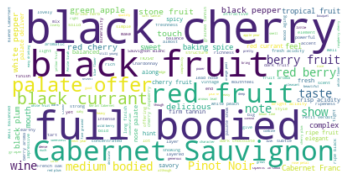

In [22]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["drink", "now", "wine", "flavor", "flavors"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Alice mask readin example https://amueller.github.io/word_cloud/auto_examples/masked.html 

In [23]:

wine_mask = np.array(Image.open("/content/drive/My Drive/Mount_data/mask image.png"))
wine_mask

array([[[248, 248, 248],
        [247, 247, 247],
        [247, 247, 247],
        ...,
        [247, 247, 247],
        [247, 247, 247],
        [247, 247, 247]],

       [[247, 247, 247],
        [246, 246, 246],
        [246, 246, 246],
        ...,
        [246, 246, 246],
        [246, 246, 246],
        [247, 247, 247]],

       [[247, 247, 247],
        [246, 246, 246],
        [246, 246, 246],
        ...,
        [246, 246, 246],
        [246, 246, 246],
        [247, 247, 247]],

       ...,

       [[247, 247, 247],
        [247, 247, 247],
        [246, 246, 246],
        ...,
        [246, 246, 246],
        [247, 247, 247],
        [247, 247, 247]],

       [[247, 247, 247],
        [246, 246, 246],
        [246, 246, 246],
        ...,
        [247, 247, 247],
        [247, 247, 247],
        [247, 247, 247]],

       [[248, 248, 248],
        [247, 247, 247],
        [247, 247, 247],
        ...,
        [247, 247, 247],
        [247, 247, 247],
        [247, 247, 247]]

In [ ]:
'''
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val'''

In [ ]:
'''
# Transform your mask into a new one that will work with the function:
transformed_wine_mask = np.ndarray((wine_mask.shape[0],wine_mask.shape[1]), np.int32)

for i in range(len(wine_mask)):
    transformed_wine_mask[i] = list(map(transform_format, wine_mask[i]))'''

In [27]:
# Check the expected result of your mask?????????????
transformed_wine_mask
# all the value should be 255

array([[-460552, -526345, -526345, ..., -526345, -526345, -526345],
       [-526345, -592138, -592138, ..., -592138, -592138, -526345],
       [-526345, -592138, -592138, ..., -592138, -592138, -526345],
       ...,
       [-526345, -526345, -592138, ..., -592138, -526345, -526345],
       [-526345, -592138, -592138, ..., -526345, -526345, -526345],
       [-460552, -526345, -526345, ..., -526345, -526345, -526345]],
      dtype=int32)

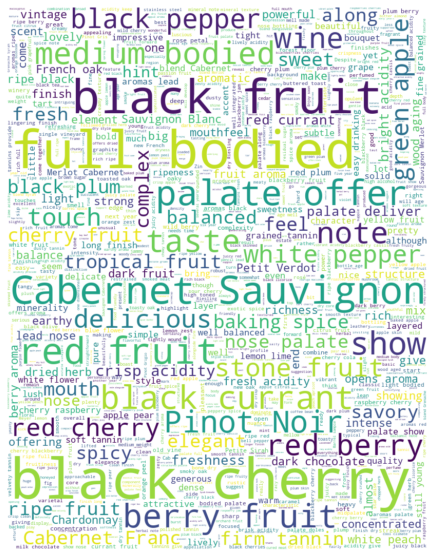

In [32]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_wine_mask,
               stopwords=stopwords, contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("/content/drive/My Drive/Mount_data/winemaske.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

**很桑心没有成功。**
Source: https://www.datacamp.com/community/tutorials/wordcloud-python?